<a href="https://colab.research.google.com/github/pascalfriederich/programming_exercises/blob/main/exercise04_lock_in_amp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from math import cos, sin, pi
from scipy.fftpack import rfft, irfft, fftfreq, fft, ifft

In [3]:
timestep = 1e-4
max_time = 5.0
num_steps = int(round(max_time/timestep))
times = np.linspace(0, max_time, num_steps)
phase = 0

frequency_ref = 50.0
# make a sine wave with frequecy "frequency_ref": Remember that a sine is f(t) = sin(2*pi*freq*t + phase)
signal_ref = np.sin(2*pi*frequency_ref*times)

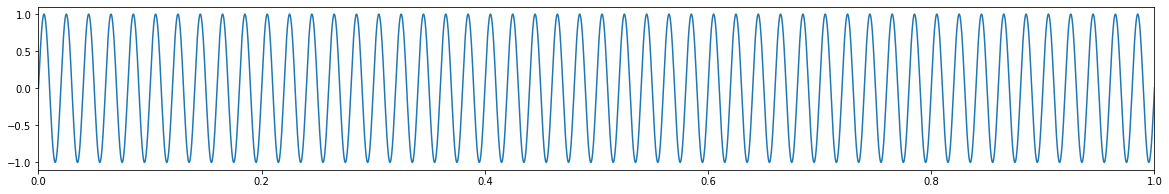

In [5]:
plt.figure(figsize = (20, 3))
plt.plot(times, signal_ref, "-")
plt.xlim(0,1)
# plot the signal_ref as a function of time, and show time interval 0 to 1
plt.show()

In [8]:
# Fourier transform functions
signal_ref_spectrum = rfft(signal_ref)
frequencies = fftfreq(signal_ref.size, d=times[1]-times[0])/2.0
print(frequencies)
order = np.argsort(frequencies)

[ 0.        0.099998  0.199996 ... -0.299994 -0.199996 -0.099998]


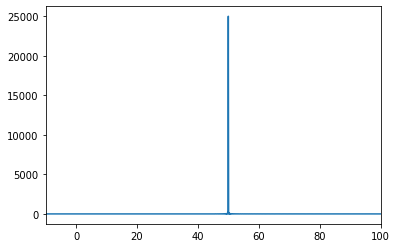

In [10]:
max_freq_to_plot = 100.0
plt.figure()
plt.plot(frequencies[order],np.abs(signal_ref_spectrum)[order])
plt.xlim(-10,max_freq_to_plot)
plt.show()
# plot the "signal_ref_spectrum" over the "frequencies" with "order", from -10 to "max_freq_to_plot"

In [17]:
#making some noise
phase = 0.2*np.pi
noise_level = 20
# make a sine wave with frequecy "frequency_ref" and phase shift "phase"
signal_new = np.sin(2*pi*frequency_ref*times+phase)
# make a list of noise values of the same size as the noise signal, multiplied with "noise_level"
noise = np.random.random(size=len(signal_new))*noise_level
signal_noise = signal_new + noise

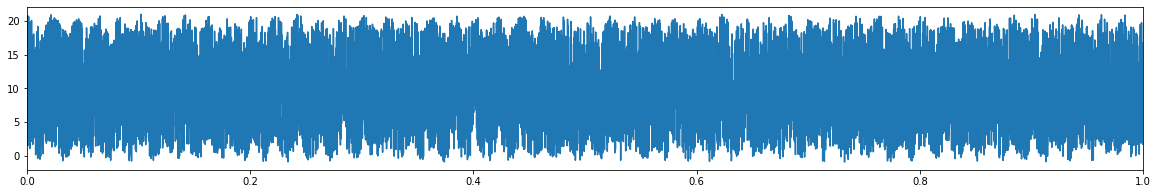

In [18]:
# plot the noisy signal over time, again from 0 to 1
plt.figure(figsize = (20, 3))
plt.plot(times,signal_noise)
plt.xlim(0,1)
plt.show()

In [20]:
# Fourier transform functions
signal_noise_spectrum = rfft(signal_noise)
frequencies_noise = fftfreq(signal_noise_spectrum.size, d=times[1]-times[0])/2.0
order_noise = np.argsort(frequencies_noise)

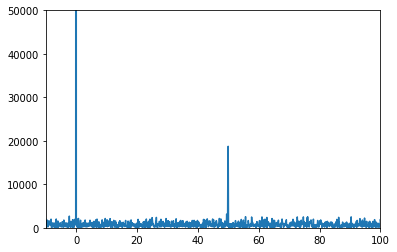

In [22]:
max_freq_to_plot = 100.0
# plot the "signal_noise_spectrum" over the "frequencies_noise" with "order_noise", from -10 to "max_freq_to_plot"
max_freq_to_plot = 100.0
plt.figure()
plt.plot(frequencies_noise[order_noise],np.abs(signal_noise_spectrum)[order_noise])
plt.xlim(-10,max_freq_to_plot)
plt.ylim(0,50000)
plt.show()

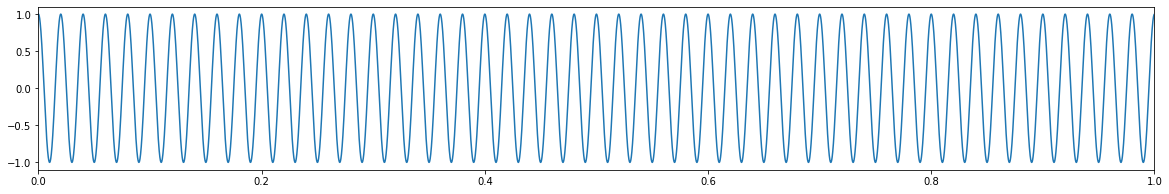

In [24]:
# Lock in amplifier

# make a new reference signal, shifted by pi/2 compared to the first reference signal
signal_ref_shifted = np.sin(2*pi*frequency_ref*times+pi/2)

# plot the shifted signal, just to check
plt.figure(figsize = (20, 3))
plt.plot(times, signal_ref_shifted)
plt.xlim(0,1)
plt.show()

2000


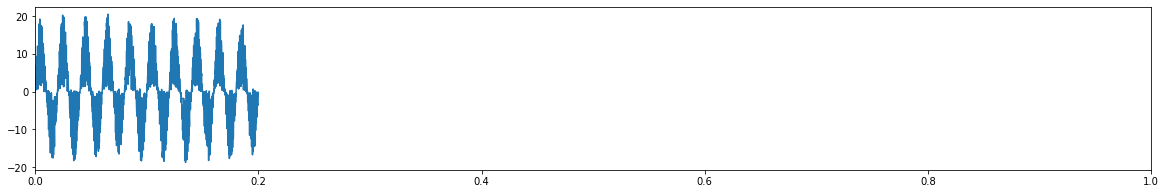

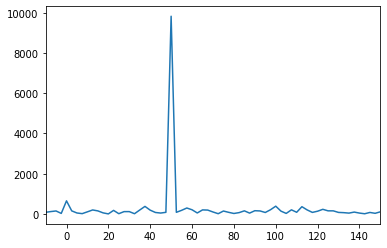

0.3191754594110684


In [34]:
integration_time = 0.2
n_steps_to_average = int(round(integration_time / timestep))
print(n_steps_to_average)

# multiply "signal_ref" with "signal_noise", over the first "n_steps_to_average" timesteps
signal_multiplied1 = signal_ref[0:n_steps_to_average]*signal_noise[0:n_steps_to_average]
# same for "signal_ref_shifted"
signal_multiplied2 = signal_ref_shifted[0:n_steps_to_average]*signal_noise[0:n_steps_to_average]

# do the fourrier transform of signal_multiplied1
signal_multiplied1_spectrum = rfft(signal_multiplied1)
frequencies = fftfreq(signal_multiplied1_spectrum.size, d=times[1]-times[0])/2.0
order = np.argsort(frequencies)

# multiplied signal plot
plt.figure(figsize = (20, 3))
plt.plot(times[0:n_steps_to_average],signal_multiplied1)
plt.xlim(0,1)
plt.show()

# frequency spectrum plot
max_freq_to_plot = 150.0

plt.figure()
plt.plot(frequencies[order], np.abs(signal_multiplied1_spectrum[order]))
plt.xlim(-10,max_freq_to_plot)
plt.show()

theta = np.arctan2(np.mean(signal_multiplied2), np.mean(signal_multiplied1))
print(theta/pi)

In [35]:
integration_times = np.linspace(0.01, 5.0, 1000)
signals_mean1 = []
signals_mean2 = []
thetas = []
for idx, integration_time in enumerate(integration_times):
    n_steps_to_average = int(round(integration_time / 1e-4))
    signal_multiplied1 = signal_ref[:n_steps_to_average] * signal_noise[:n_steps_to_average]
    signal_multiplied_mean1 = 1/float(n_steps_to_average)*np.sum(signal_multiplied1)
    signals_mean1.append(signal_multiplied_mean1)
    
    signal_multiplied2 = signal_ref_shifted[:n_steps_to_average] * signal_noise[:n_steps_to_average]
    signal_multiplied_mean2 = 1/float(n_steps_to_average)*np.sum(signal_multiplied2)
    signals_mean2.append(signal_multiplied_mean2)
    
    theta = np.arctan2(signal_multiplied_mean2, signal_multiplied_mean1)
    thetas.append(theta/np.pi)

print("Phase from lock-amplifier: %.2f pi"%(np.mean(thetas[-20:])))

Phase from lock-amplifier: 0.22 pi


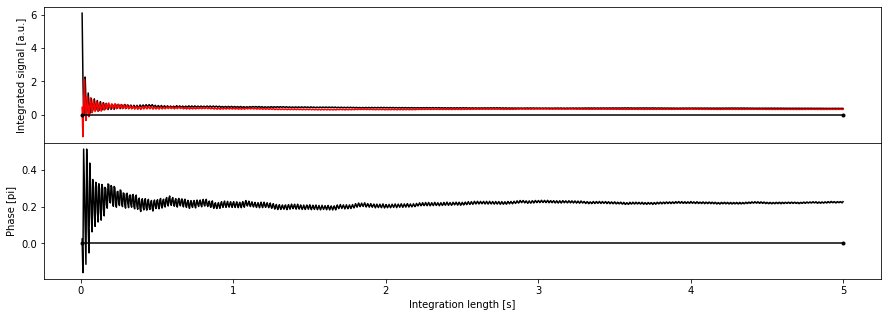

In [36]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15, 5))
axes[0].plot(integration_times, signals_mean1, "k-")
axes[0].plot(integration_times, signals_mean2, "r-")
axes[0].plot([integration_times[0], integration_times[-1]], [0.0, 0.0], "k.-")
axes[1].plot(integration_times, thetas, "k-")
axes[1].plot([integration_times[0], integration_times[-1]], [0.0, 0.0], "k.-")
axes[0].set_xlabel("")
axes[1].set_xlabel("Integration length [s]")
axes[0].set_ylabel("Integrated signal [a.u.]")
axes[1].set_ylabel("Phase [pi]")
plt.subplots_adjust(hspace=0)
plt.show()